In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('Naive-Bayes-Classification medical-Data.csv')

In [3]:
df.head(5)


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [4]:
df.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [5]:
df.shape


(995, 3)

In [6]:
X=df.drop('diabetes',axis=1)

In [7]:
X

,glucose,bloodpressure
0,40,85
1,40,92
2,45,63
3,45,80
4,40,73
...,...,...
990,45,87
991,40,83
992,40,83
993,40,60


In [8]:
y=df['diabetes']


In [9]:
y

0      0
1      0
2      1
3      0
4      1
      ..
990    0
991    0
992    0
993    1
994    0
Name: diabetes, Length: 995, dtype: int64

array([[<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bloodpressure'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

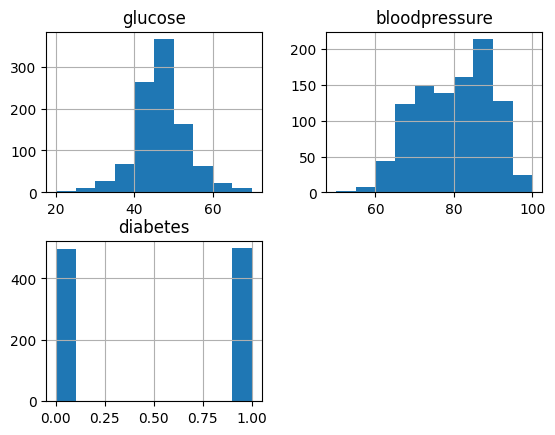

In [10]:
df.hist()

In [11]:
df.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


<Axes: >

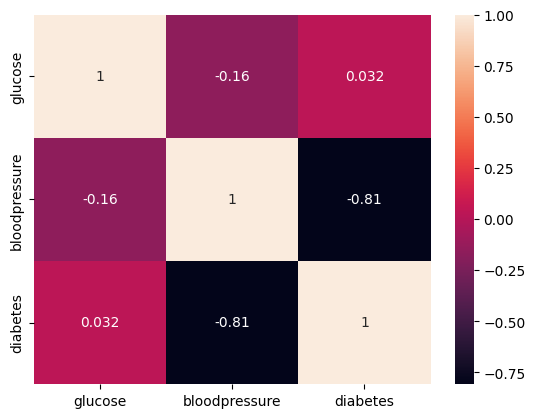

In [12]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='glucose', ylabel='bloodpressure'>

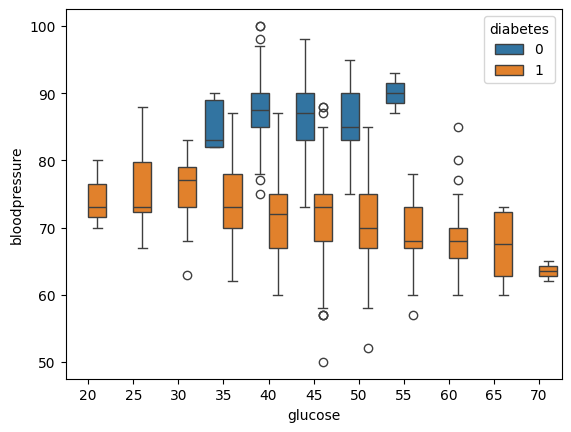

In [13]:
sns.boxplot(x='glucose',y='bloodpressure',hue='diabetes',data=df)

<Axes: xlabel='glucose', ylabel='bloodpressure'>

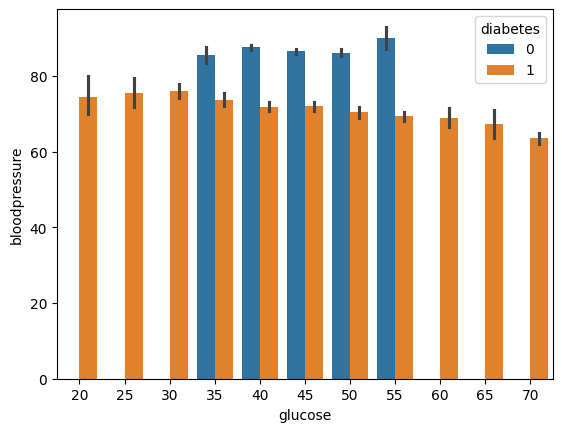

In [14]:
sns.barplot(x='glucose',y='bloodpressure',hue='diabetes',data=df)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
nb_classifier=GaussianNB()

In [17]:
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [18]:
y_pred=nb_classifier.predict(X_test)

In [19]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9296482412060302


In [20]:
classification_report=classification_report(y_test,y_pred)
print('Classification_report:',classification_report)

Classification_report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



In [21]:
#Prediction
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0])

C:\Users\KAUSHIK\AppData\Local\Temp\ipykernel_13152\2639116456.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette=['red', 'blue'])


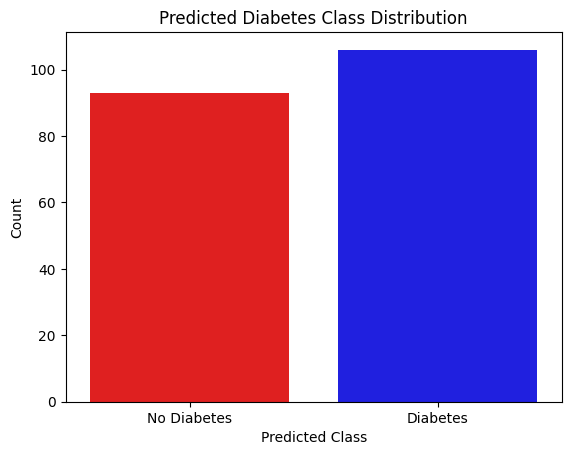

In [56]:
sns.countplot(x=y_pred, palette=['red', 'blue'])
plt.title('Predicted Diabetes Class Distribution')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()